## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [35]:
sns.set_theme(style='darkgrid')

In [36]:
df = pd.read_csv('IT_customer_churn.csv')

In [37]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [38]:
df.tail(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [39]:
df.shape

(7043, 20)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [42]:
df.isna().sum().sum()

0

In [43]:
df.duplicated().sum()

22

In [44]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [45]:
df.shape

(7021, 20)

In [46]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [47]:
for feature in df.columns:
    print(f'{feature} --> {df[feature].unique()}')

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No phone service' 'No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes' 'No internet service']
OnlineBackup --> ['Yes' 'No' 'No internet service']
DeviceProtection --> ['No' 'Yes' 'No internet service']
TechSupport --> ['No' 'Yes' 'No internet service']
StreamingTV --> ['No' 'Yes' 'No internet service']
StreamingMovies --> ['No' 'Yes' 'No internet service']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -

In [48]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['MultipleLines'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['DeviceProtection'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['TechSupport'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['StreamingTV'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['StreamingMovies'] = df['OnlineSecurity'].replace('No internet service', 'No')

In [50]:
df['TotalCharges'] = df['TotalCharges'].replace("'", "").replace('"','').replace(" ", "").replace('', np.nan).astype('float')

In [17]:
# df['TotalCharges-isdigit'] = df['TotalCharges'].apply(lambda x: str(int(float(x))).isdigit())

In [18]:
# df['TotalCharges-isdigit'].sum()

In [19]:
# df[df['TotalCharges-isdigit'] == False].shape[0]

In [51]:
df.isna().sum()/df.shape[0]

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001567
Churn               0.000000
dtype: float64

In [52]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [22]:
df.shape

(7010, 20)

## Visualize

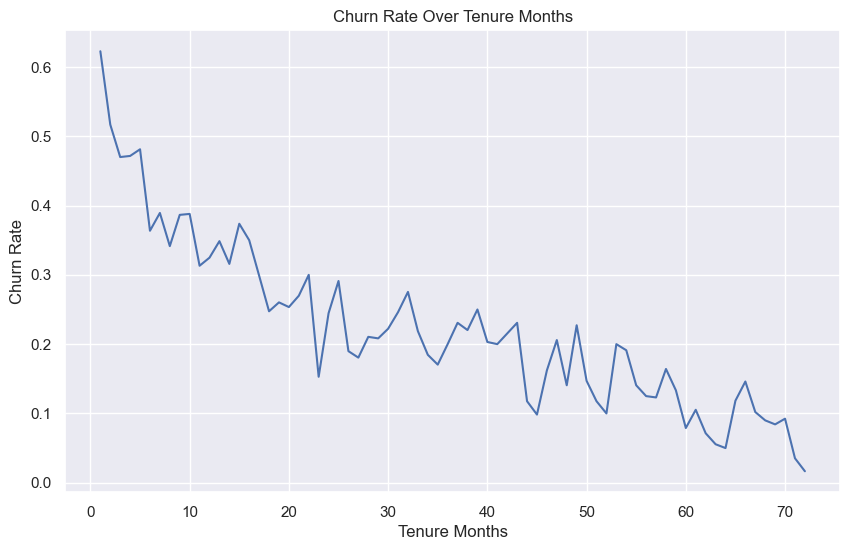

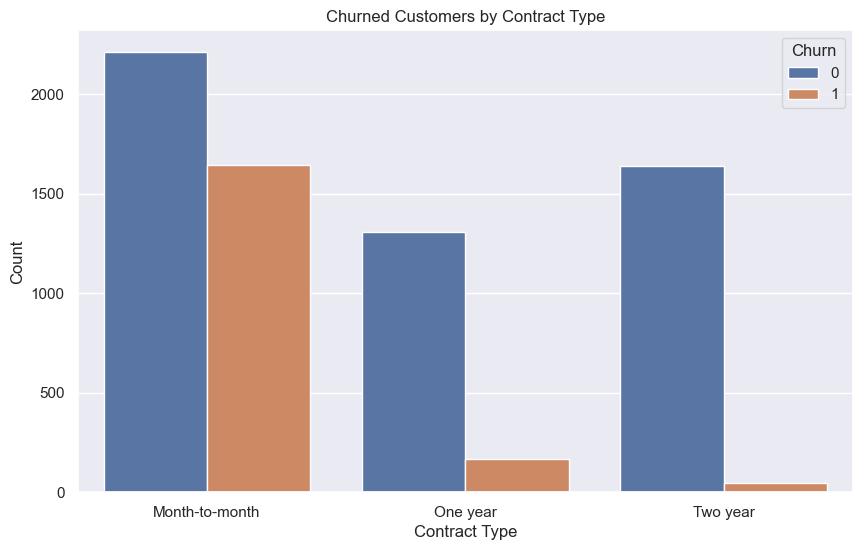

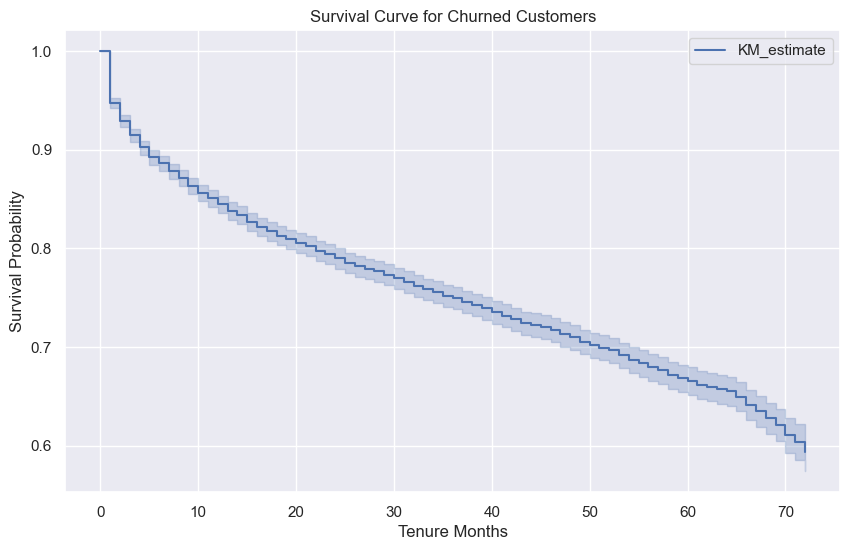

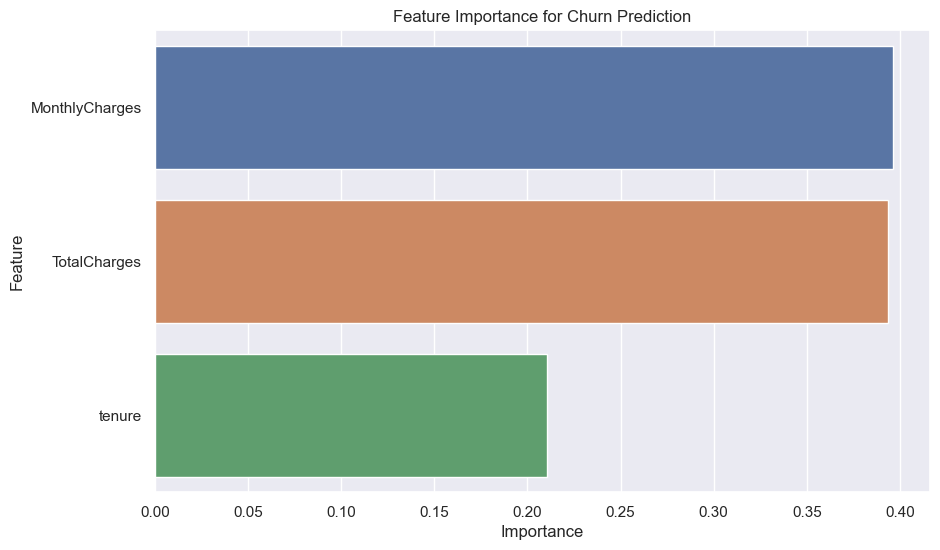

In [54]:
from lifelines import KaplanMeierFitter
from sklearn.ensemble import RandomForestClassifier

# Convert 'Churn' column to numeric dtype
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

# Churn rate over time
df['tenure_months'] = df['tenure']
churn_rate_over_time = df.groupby('tenure_months')['Churn'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=churn_rate_over_time.index, y=churn_rate_over_time.values)
plt.title('Churn Rate Over Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Rate')
plt.show()

# Customer segmentation
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churned Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Survival analysis
kmf = KaplanMeierFitter()
kmf.fit(durations=df['tenure_months'], event_observed=df['Churn'])

plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Survival Curve for Churned Customers')
plt.xlabel('Tenure Months')
plt.ylabel('Survival Probability')
plt.show()

# Feature importance
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Label Encoding

In [55]:
for feature in df.columns:
    print(f'{feature} --> {df[feature].unique()}')

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes']
OnlineBackup --> ['No' 'Yes']
DeviceProtection --> ['No' 'Yes']
TechSupport --> ['No' 'Yes']
StreamingTV --> ['No' 'Yes']
StreamingMovies --> ['No' 'Yes']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> [0 1]
tenure_months --> [ 1 3

In [60]:
df_cat = df.select_dtypes(exclude='number')

In [61]:
df_num = df.select_dtypes(include='number')

In [64]:
encod = LabelEncoder()
encod.fit_transform(df_cat.values)

ValueError: y should be a 1d array, got an array of shape (7010, 15) instead.

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [ ]:
from lifelines import KaplanMeierFitter
from sklearn.ensemble import RandomForestClassifier

# Convert 'Churn' column to numeric dtype
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

# Churn rate over time
df['tenure_months'] = df['tenure']
churn_rate_over_time = df.groupby('tenure_months')['Churn'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=churn_rate_over_time.index, y=churn_rate_over_time.values)
plt.title('Churn Rate Over Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Rate')
plt.show()

# Customer segmentation
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churned Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Survival analysis
kmf = KaplanMeierFitter()
kmf.fit(durations=df['tenure_months'], event_observed=df['Churn'])

plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Survival Curve for Churned Customers')
plt.xlabel('Tenure Months')
plt.ylabel('Survival Probability')
plt.show()

# Feature importance
X = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']]
y = df['Churn']

rf = RandomForestClassifier()
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Visualization

In [ ]:
cat_columns = df.select_dtypes('category')

In [ ]:
df_dummies 